In [1]:
main_name= 'test3_'

In [2]:
import fastshap_wrapper as fw

In [3]:
from cifar10_experiment import CIFAR10AugmentationExperiment

In [4]:
import torchvision

In [5]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [16]:
c = CIFAR10AugmentationExperiment(transform)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
c.train(nepoch=1, batch_size=256, experiment_name=main_name)

Files already downloaded and verified
Files already downloaded and verified


Training loop:   0%|          | 0/195 [00:00<?, ?it/s]

----- Epoch = 1 -----
Val loss = 1.0254
Val acc = 0.6401

New best epoch, acc = 0.6401



In [7]:
# train_hist = []
# with open(main_name+"train_hist.txt", "r") as f:
#   for line in f:
#     train_hist.append(float(line.strip()))
    
# val_hist = []
# with open(main_name+"val_hist.txt", "r") as f:
#   for line in f:
#     val_hist.append(float(line.strip()))

# train_hist

# val_hist

In [8]:
# import torch
# torch.load('testcifar resnet.pt').to('cuda')

In [9]:
%%time
results = fw.fastshap_wrapper(c.model, c.train_set, c.test_set, surrogate_epochs=1, explainer_epochs=1, experiment_name=main_name)

Loading saved surrogate model
Loading saved explainer model
CPU times: user 67.9 ms, sys: 50 ms, total: 118 ms
Wall time: 20.1 s


In [10]:
%%time
import numpy as np
np.save(main_name+'shapley_values.npy',results.plot_results(c.test_set, return_raw=True, num_samples=50))

CPU times: user 13.3 s, sys: 9.22 s, total: 22.5 s
Wall time: 22.6 s


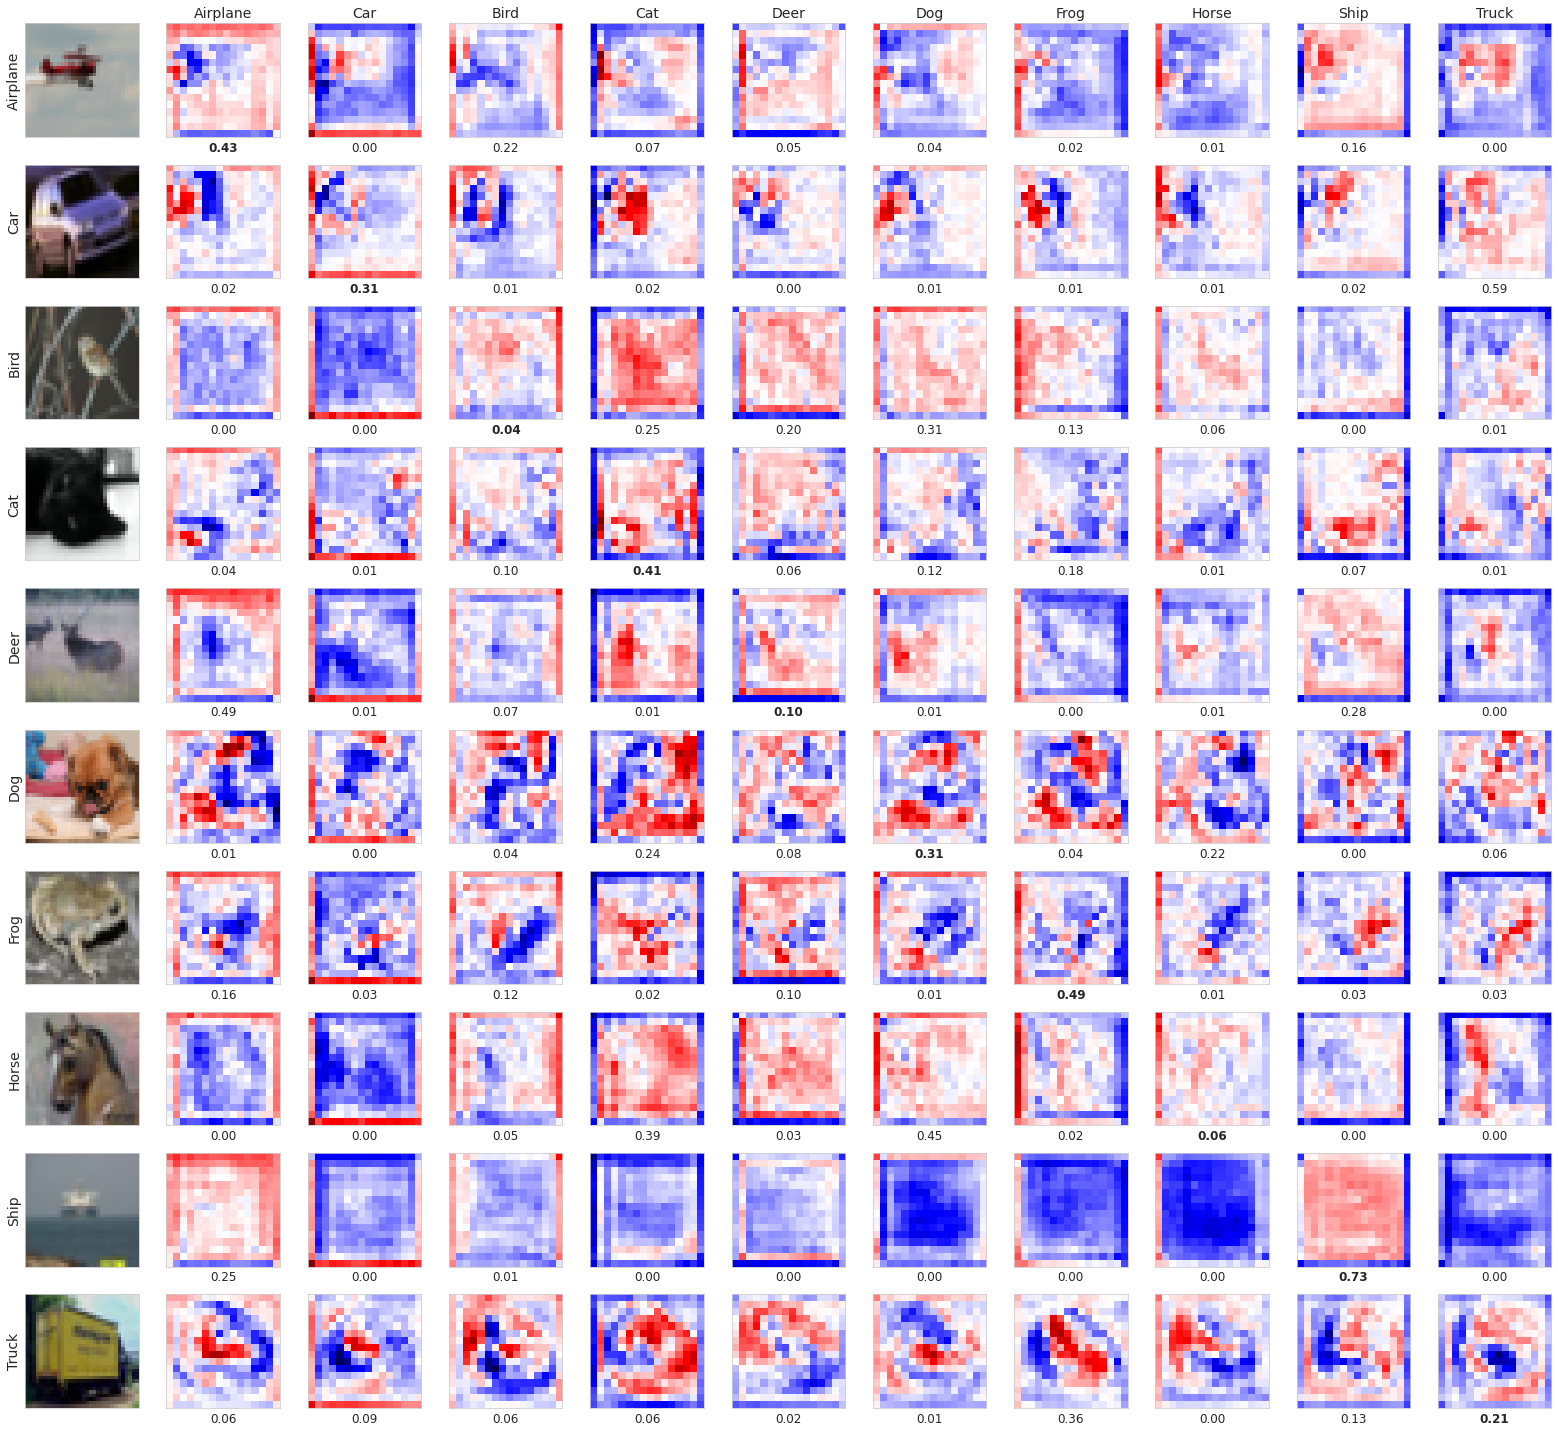

In [18]:
results.plot_results(c.test_set)

<AxesSubplot:ylabel='Density'>

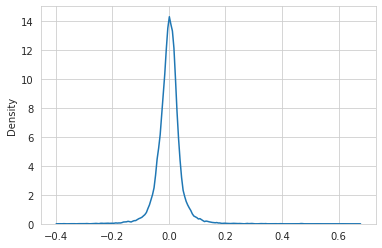

In [31]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
shapley_values = results.plot_results(c.test_set, return_raw=True, num_samples=50).reshape(-1)
sns.kdeplot(values, bw_adjust=0.5)

In [32]:
import pandas as pd
pd.DataFrame(shapley_values).skew()

0    0.67795
dtype: float32

In [33]:
import pandas as pd
pd.DataFrame(shapley_values).kurtosis()

0    37.417393
dtype: float32

In [34]:
pd.DataFrame(shapley_values).describe()

,0
count,128000.000000
mean,0.000086
std,0.049646
min,-0.837394
25%,-0.019131
50%,0.001271
75%,0.019445
max,1.232463


In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = results.plot_results(c.test_set, return_raw=True, num_samples=10).reshape(100,-1)

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits)

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# # sample 44 new points from the data
# new_data = kde.sample(44, random_state=0)
# new_data = pca.inverse_transform(new_data)

# # turn data into a 4x11 grid
# new_data = new_data.reshape((4, 11, -1))
# # real_data = digits.data[:44].reshape((4, 11, -1))

# # plot real digits and resampled digits
# fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
# for j in range(11):
#     ax[4, j].set_visible(False)
#     for i in range(4):
# #         im = ax[i, j].imshow(
# #             real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
# #         )
# #         im.set_clim(0, 16)
#         im = ax[i + 5, j].imshow(
#             new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
#         )
#         im.set_clim(0, 16)

# ax[0, 5].set_title("Selection from the input data")
# ax[5, 5].set_title('"New" digits drawn from the kernel density model')

# plt.show()

best bandwidth: 0.16237767391887217


/home-nfs/raphaelr/miniconda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home-nfs/raphaelr/miniconda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home-nfs/raphaelr/miniconda/lib/python3.8/site-packages/sklearn/model_sele